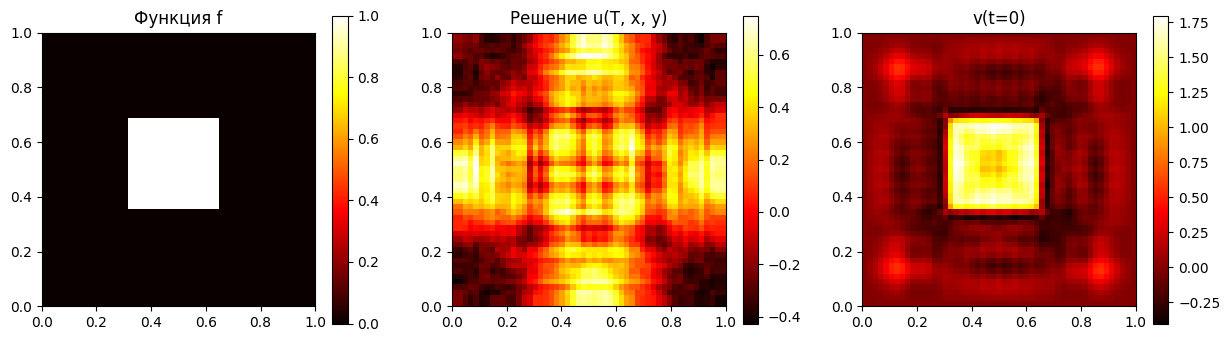

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# параметры задачи
a = 1.0      # размер области
Nx, Ny = 50, 50  # количество узлов сетки
T = 1.0      # время моделирования
Nt = 100     # количество временных шагов
c = 1.0      # скорость распространения волн

dx = a / Nx
dy = a / Ny
dt = T / Nt

# проверка условия устойчивости (условие Куранта)
assert c * dt <= dx / np.sqrt(2), "Условие устойчивости не выполнено! уменьшите шаг dt или увеличьте dx."

# инициализация массивов
u = np.zeros((Nx+1, Ny+1, Nt+1))

# функция f в виде функции хевисайда
f = np.zeros((Nx+1, Ny+1))
f[Nx//3:2*Nx//3, Ny//3:2*Ny//3] = 1  # источник в центре области

# начальные условия
u[:, :, 0] = f
u[:, :, 1] = u[:, :, 0]  # нулевая начальная скорость

# явный метод конечных разностей для решения прямой задачи
for n in range(1, Nt):
    for i in range(1, Nx):
        for j in range(1, Ny):
            u[i, j, n+1] = 2*u[i, j, n] - u[i, j, n-1] + c**2 * dt**2 * (
                (u[i+1, j, n] - 2*u[i, j, n] + u[i-1, j, n]) / dx**2 +
                (u[i, j+1, n] - 2*u[i, j, n] + u[i, j-1, n]) / dy**2
            )
    
    # граничные условия (Неймана)
    u[0, :, n+1] = u[1, :, n+1]
    u[Nx, :, n+1] = u[Nx-1, :, n+1]
    u[:, 0, n+1] = u[:, 1, n+1]
    u[:, Ny, n+1] = u[:, Ny-1, n+1]

# обратная задача: восстановление f из граничных данных
v = np.zeros_like(u)
v[:, :, Nt] = 0  # условие на конце временного промежутка
v[:, :, Nt-1] = 0  # нулевая скорость

for n in range(Nt-1, 0, -1):
    for i in range(1, Nx):
        for j in range(1, Ny):
            v[i, j, n-1] = 2*v[i, j, n] - v[i, j, n+1] + c**2 * dt**2 * (
                (v[i+1, j, n] - 2*v[i, j, n] + v[i-1, j, n]) / dx**2 +
                (v[i, j+1, n] - 2*v[i, j, n] + v[i, j-1, n]) / dy**2
            )
    
    # граничные условия (заданы значениями u на границе)
    v[0, :, n-1] = u[0, :, n-1]
    v[Nx, :, n-1] = u[Nx, :, n-1]
    v[:, 0, n-1] = u[:, 0, n-1]
    v[:, Ny, n-1] = u[:, Ny, n-1]

# визуализация
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.imshow(f, cmap='hot', extent=[0, a, 0, a])
plt.colorbar()
plt.title("Функция f")

plt.subplot(1, 3, 2)
plt.imshow(u[:, :, -1], cmap='hot', extent=[0, a, 0, a])
plt.colorbar()
plt.title("Решение u(T, x, y)")

plt.subplot(1, 3, 3)
plt.imshow(v[:, :, 0], cmap='hot', extent=[0, a, 0, a])
plt.colorbar()
plt.title("v(t=0)")

plt.show()
